# 📌 프로젝트 개요: 폐 X-ray 이미지 세분화 (Segmentation)

## 📝 개요
이 프로젝트는 **폐 X-ray 이미지에서 폐 및 관련 구조를 세분화(Segmentation)하는 U-Net 기반의 딥러닝 모델**을 구축하는 것입니다.  

주어진 X-ray 이미지를 처리하고, U-Net 모델을 학습시켜 마스크(ground truth)와 비교하여 성능을 평가합니다.

**논문에서 제안된 U-Net 아키텍처**를 기반으로 모델을 설계하였습니다.
### 📖 참고 논문
[U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)  

### 📌 U-Net 아키텍처 구조
![U-Net 아키텍처](./etc/unet_architecture.png)

---

## 🏗️ 주요 단계
### 1. 데이터 로드 및 전처리
   - DICOM 형식의 의료 이미지를 불러오고 PNG 또는 TIFF 마스크를 읽음
   - 이미지 및 마스크를 256x256 크기로 조정
   - 마스크의 픽셀 값을 3개의 클래스로 인코딩

### 2. 데이터 분할
   - `train_test_split`을 활용하여 학습 데이터와 검증 데이터를 나눔

### 3. U-Net 모델 정의 및 학습
   - CNN 기반의 U-Net 모델 구축
   - `Adam` 옵티마이저 및 `categorical_crossentropy` 손실 함수 사용
   - `accuracy`를 평가 지표로 설정
   - **EarlyStopping**을 도입하여 과적합 방지

### 4. 모델 학습 및 평가
   - 학습 진행 후 검증 데이터에 대한 예측 결과 확인
   - 예측된 마스크를 시각화하여 성능 확인

---

## 🤖 옵티마이저 & 손실 함수 선택
### 🔹 1. 옵티마이저: `Adam`
- Adam 옵티마이저는 학습 속도 조절이 뛰어나고, 초깃값 설정에 민감하지 않음
- 학습률(`learning_rate`)을 0.0001로 설정하여 안정적인 학습 진행

### 🔹 2. 손실 함수: `categorical_crossentropy`
- 다중 클래스 분류 문제이므로 소프트맥스 출력층과 함께 사용
- 마스크를 원-핫 인코딩 형태로 변환하여 적용

---

## 📊 성능 평가
### 🔍 1. 평가 방법
모델의 성능을 평가하기 위해 **예측된 마스크와 실제 마스크를 비교하여 주요 지표를 계산**합니다.  
**픽셀 단위의 정확도(Accuracy)와 세그멘테이션 평가 지표인 IoU, Dice Score를 사용**합니다.

---

## 📏 2. 주요 성능 지표

### 🔹 1. Accuracy (정확도)
- 전체 픽셀 중에서 정확하게 예측된 픽셀의 비율을 의미합니다.
- 값이 1에 가까울수록 모델이 픽셀을 더 정확하게 분류한 것입니다.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

---

### 🔹 2. IoU (Intersection over Union, 교집합/합집합 비율)
- 예측된 마스크와 실제 마스크 간의 교집합(Intersection)과 합집합(Union)의 비율을 나타냅니다.
- IoU 값이 1에 가까울수록 모델의 예측이 실제 마스크와 더욱 유사함을 의미합니다.
- 보통 **0.75 이상이면 우수한 성능**으로 간주됩니다.

$$
IoU = \frac{|A \cap B|}{|A \cup B|}
$$

---

### 🔹 3. Dice Score (F1-score for Segmentation)
- IoU와 유사하지만, 두 영역 간의 조화 평균을 이용하여 측정하는 방식입니다.
- 값이 1에 가까울수록 예측된 마스크가 실제 마스크와 거의 동일함을 의미합니다.
- 일반적으로 **0.8 이상이면 좋은 성능**으로 간주됩니다.

$$
Dice = \frac{2 \times |A \cap B|}{|A| + |B|}
$$

---

## 🔎 3. 결과 해석

### 🔹 1. Mean Accuracy (95.29%)
- 전체 픽셀 중에서 정확하게 분류된 픽셀의 비율이 **95.29%**로 높음  
- 모델이 대부분의 픽셀을 올바르게 예측하고 있음  

### 🔹 2. Mean IoU (89.08%)
- 예측된 마스크와 실제 마스크 간의 **교집합 대비 합집합 비율**이 **89.08%**  
- IoU 값이 **0.8 이상이면 우수한 성능**으로 간주됨  
- 모델이 실제 마스크와 상당히 일치하는 결과를 도출  

### 🔹 3. Mean Dice Score (94.13%)
- IoU와 유사하지만, 두 영역의 평균적인 일치를 평가하는 지표  
- 일반적으로 **0.9 이상이면 매우 우수한 성능**  
- 모델이 예측한 분할 영역이 실제 마스크와 거의 동일하게 분할됨  

---

## ⚠️ 4. 개선 가능성

### 🛠 1) 경계선(Edge) 처리 개선
- **IoU가 90%를 넘지 못한 샘플이 일부 존재**  
- 일부 케이스에서 **경계 모호성(Blurring)이 발생할 가능성**  
- **Boundary Loss 또는 Lovasz Softmax Loss 적용 가능**  
- **Data Augmentation (회전, 대비 조정, 랜덤 크롭)**을 활용하여 경계 구분 능력 향상 가능  

### 🛠 2) 데이터 불균형 해결
- 특정 클래스(예: 폐 내부, 주변 조직 등)의 데이터가 적다면 일부 영역에서 성능 저하 가능  
- **클래스 가중치 적용**  
- **Focal Loss 사용하여 작은 객체(경계선 등) 예측 강화**  

---

### ✅ 5. 최종 정리
✔ **95.29%의 정확도로 높은 성능을 보이는 모델**  
✔ **IoU(89.08%) 및 Dice Score(94.13%)를 통해 예측 마스크와 실제 마스크의 높은 일치율 확인**  
✔ **폐 X-ray 이미지에서 폐와 위 조직을 효과적으로 세분화하는 모델로 활용 가능**  
✔ **경계 구분을 더욱 정밀하게 하기 위한 추가적인 개선 가능성 존재**  

## 1. 데이터 로드 및 전처리

In [6]:

import numpy as np
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 경로 설정
data_path = "./CXR_AP/"
image_path = os.path.join(data_path, "DCM")
mask_path = os.path.join(data_path, "GT")

# 이미지 및 마스크 로드
images, masks = [], []

for path, _, files in os.walk(image_path):
    for name in files:
        imagepath = os.path.join(path, name)
        maskpath = imagepath.replace("DCM", "GT").replace("tiff", "png")
        # print(imagepath + "  " + maskpath)
        # 이미지 로드 및 전처리
        image = Image.open(imagepath)
        image = np.array(image)
        image = cv2.resize(image, (256, 256))
        
        # 마스크 로드 및 전처리
        mask = cv2.imread(maskpath, cv2.IMREAD_GRAYSCALE)
        mask = np.where(mask == 76, 1, mask)
        mask = np.where(mask == 149, 2, mask)
        mask = cv2.resize(mask, (256, 256))
        
        images.append(image)
        masks.append(mask)

# NumPy 배열 변환
images = np.array(images)
masks = np.array(masks)

In [35]:
print(f"이미지 데이터 수 : {len(images):,}")
print(f"마스킹 데이터 수 : {len(masks):,}")

이미지 데이터 수 : 624
마스킹 데이터 수 : 624


In [8]:
# 이미지 정규화
images = images / 255.0

# 마스크를 원-핫 인코딩 형태로 변환
GT = np.eye(3)[masks]

In [9]:
# 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(images, GT, test_size=0.2, random_state=42)

In [10]:
print(f"학습 데이터 : {len(x_train):,}")
print(f"검증 데이터 수 : {len(x_val):,}")

학습 데이터 : 499
검증 데이터 수 : 125


## 2. 모델 정의

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

class UNet(Model):
    def __init__(self, input_shape=(256, 256, 1), num_classes=3, dropout_rate=0.5, learning_rate=0.0001):
        super(UNet, self).__init__()
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.build_model()

    def conv_block(self, x, filters):
        """ 두 개의 Conv2D 연산을 적용하는 블록 """
        x = Conv2D(filters, 3, activation='relu', padding='same')(x)
        x = Conv2D(filters, 3, activation='relu', padding='same')(x)
        return x

    def encoder_block(self, x, filters):
        """ 인코더 블록: Conv + MaxPooling """
        conv = self.conv_block(x, filters)
        pool = MaxPooling2D(pool_size=(2, 2))(conv)
        return conv, pool

    def build_model(self):
        inputs = Input(self.input_shape)

        # 인코더 (Contracting Path)
        conv1, pool1 = self.encoder_block(inputs, 64)
        conv2, pool2 = self.encoder_block(pool1, 128)
        conv3, pool3 = self.encoder_block(pool2, 256)
        conv4, pool4 = self.encoder_block(pool3, 512)

        # Bottleneck
        conv5 = self.conv_block(pool4, 1024)
        drop5 = Dropout(self.dropout_rate)(conv5)

        # 디코더 (Expansive Path)
        up6 = UpSampling2D(size=(2, 2))(drop5)
        merge6 = concatenate([conv4, up6], axis=3)
        conv6 = self.conv_block(merge6, 512)

        up7 = UpSampling2D(size=(2, 2))(conv6)
        merge7 = concatenate([conv3, up7], axis=3)
        conv7 = self.conv_block(merge7, 256)

        up8 = UpSampling2D(size=(2, 2))(conv7)
        merge8 = concatenate([conv2, up8], axis=3)
        conv8 = self.conv_block(merge8, 128)

        up9 = UpSampling2D(size=(2, 2))(conv8)
        merge9 = concatenate([conv1, up9], axis=3)
        conv9 = self.conv_block(merge9, 64)

        # 출력 레이어 (다중 클래스 세분화)
        outputs = Conv2D(self.num_classes, 1, activation='softmax')(conv9)

        # 모델 생성
        self.model = Model(inputs=inputs, outputs=outputs)

    def compile_model(self):
        """ 모델 컴파일 (Adam 옵티마이저 + Categorical Crossentropy) """
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

    def summary(self):
        """ 모델 구조 출력 """
        return self.model.summary()

    def fit(self, x_train, y_train, x_val, y_val, batch_size=16, epochs=50, patience=3):
        """ 모델 학습 (val_accuracy 기준 EarlyStopping 적용) """
        early_stopping = EarlyStopping(
            monitor='val_accuracy',  # 검증 정확도를 기준으로 조기 종료
            patience=patience,  # 3 epoch 동안 변화가 없으면 학습 중지
            restore_best_weights=True,
            verbose=1  # 학습 중지 메시지 출력
        )

        return self.model.fit(
            x_train, y_train,
            validation_data=(x_val, y_val),
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[early_stopping]
        )

    def predict(self, x):
        """ 예측 수행 """
        return self.model.predict(x)


In [12]:
# 모델 인스턴스 생성
unet_model = UNet(input_shape=(256, 256, 1), num_classes=3)

# 모델 컴파일
unet_model.compile_model()

# 모델 구조 확인
unet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 16, 16,    │          0 │ conv2d_9[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 32, 32,    │          0 │ dropout[0][0]   

 Total params: 31,377,923 (119.70 MB)

 Trainable params: 31,377,923 (119.70 MB)

 Non-trainable params: 0 (0.00 B)

## 3. 모델 학습

In [13]:
history = unet_model.fit(x_train, y_train, x_val, y_val, batch_size=16, epochs=50, patience=3)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 797s 25s/step - accuracy: 0.5425 - loss: 1.0619 - val_accuracy: 0.6061 - val_loss: 0.8362
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 802s 25s/step - accuracy: 0.5999 - loss: 0.7540 - val_accuracy: 0.6061 - val_loss: 0.6564
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 801s 25s/step - accuracy: 0.6122 - loss: 0.6461 - val_accuracy: 0.7115 - val_loss: 0.5945
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 801s 25s/step - accuracy: 0.7109 - loss: 0.5766 - val_accuracy: 0.7532 - val_loss: 0.5163
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 800s 25s/step - accuracy: 0.7581 - loss: 0.5016 - val_accuracy: 0.7928 - val_loss: 0.4639
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 800s 25s/step - accuracy: 0.8135 - loss: 0.4270 - val_accuracy: 0.8252 - val_loss: 0.4168
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 801s 25s/step - accuracy: 0.8441 - loss: 0.3659 - val_accuracy: 0.8782 - val_loss: 0.3052
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 800s 25s/step - accuracy: 0.8829 - loss: 0.2922 - val_accuracy: 0.

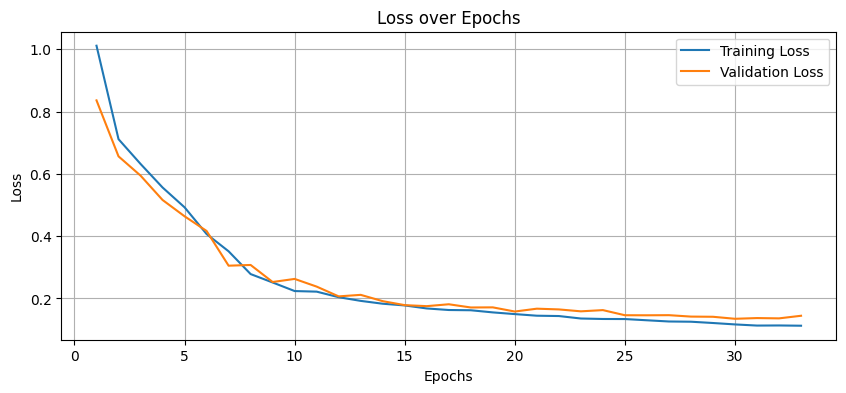

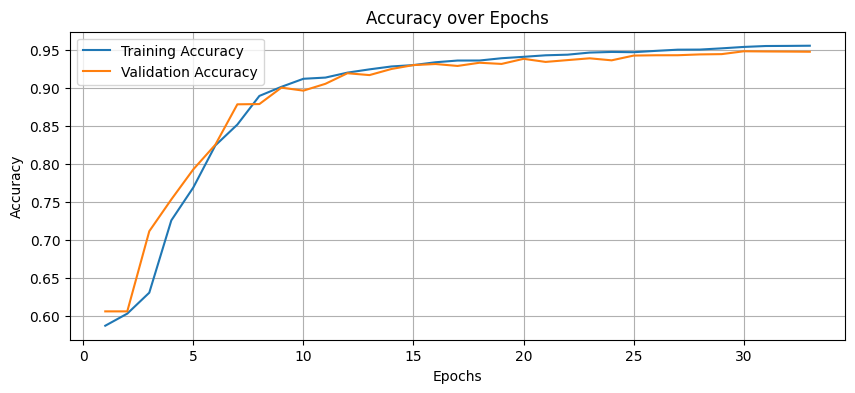

In [38]:
import matplotlib.pyplot as plt

# 에포크 범위 설정
epochs = range(1, len(history.history['loss']) + 1)

# 🔹 Loss 그래프
plt.figure(figsize=(10, 4))
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

# 🔹 Accuracy 그래프
plt.figure(figsize=(10, 4))
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()


## 4. 성능 평가

In [16]:
# 데이터 경로 설정
data_path = "./pred_data/"
image_path = os.path.join(data_path, "DCM")
mask_path = os.path.join(data_path, "GT")

# 이미지 및 마스크 로드
test_images, test_masks = [], []

for path, _, files in os.walk(image_path):
    for name in files:
        imagepath = os.path.join(path, name)
        maskpath = imagepath.replace("DCM", "GT").replace("tiff", "png")
        # print(imagepath + "  " + maskpath)
        # 이미지 로드 및 전처리
        image = Image.open(imagepath)
        image = np.array(image)
        image = cv2.resize(image, (256, 256))
        
        # 마스크 로드 및 전처리
        mask = cv2.imread(maskpath, cv2.IMREAD_GRAYSCALE)
        mask = np.where(mask == 76, 1, mask)
        mask = np.where(mask == 149, 2, mask)
        mask = cv2.resize(mask, (256, 256))
        
        test_images.append(image)
        test_masks.append(mask)

# NumPy 배열 변환
test_images = np.array(test_images)
test_masks = np.array(test_masks)

In [17]:
print(f"테스트 데이터 : {len(test_images):,}")

테스트 데이터 : 20


In [18]:
# 이미지 정규화
test_images = test_images / 255.0

In [19]:
# 예측 수행
predictions = unet_model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


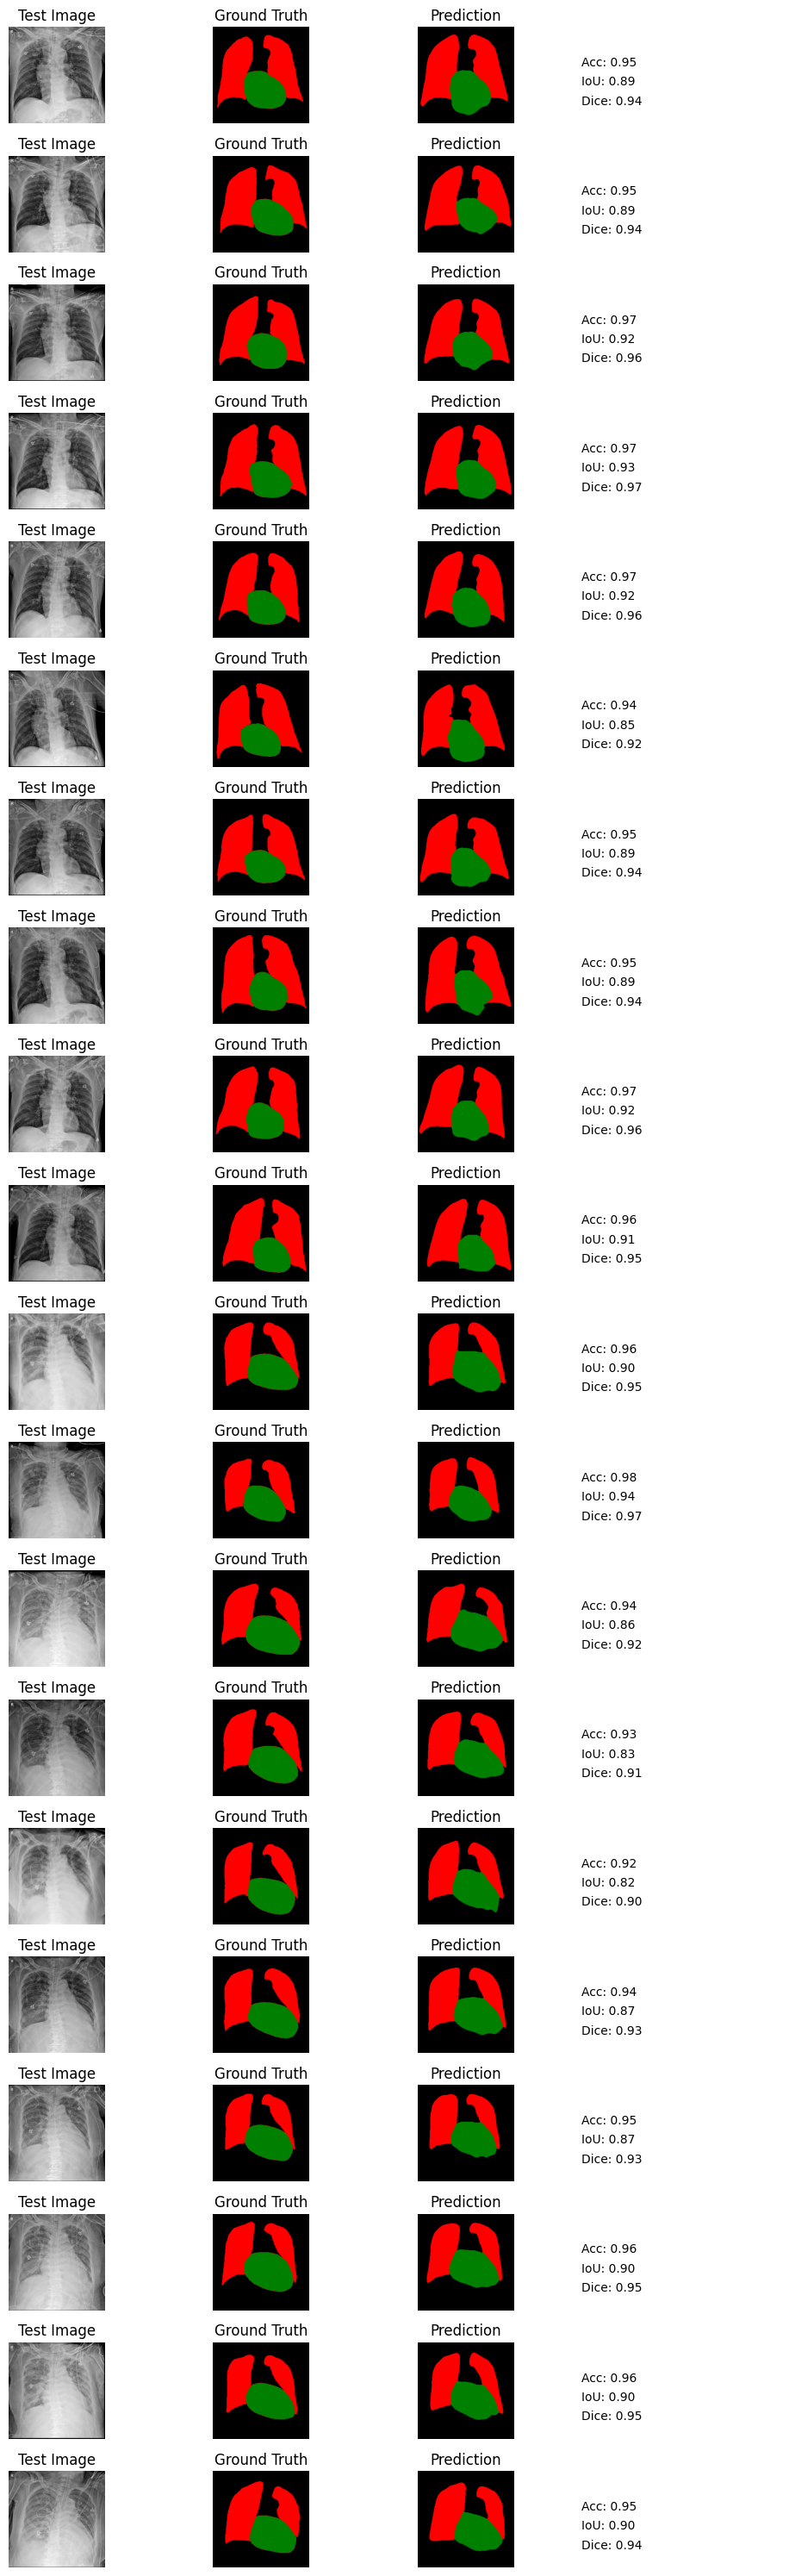

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import accuracy_score

# ------------------ 성능 지표 계산 함수 ------------------
def calculate_metrics(y_true, y_pred, num_classes):
    iou_scores = []
    dice_scores = []
    
    for cls in range(num_classes):
        intersection = np.logical_and(y_true == cls, y_pred == cls).sum()
        union = np.logical_or(y_true == cls, y_pred == cls).sum()
        
        if union == 0:
            iou = 1  # 완전히 겹치는 경우
        else:
            iou = intersection / union
        iou_scores.append(iou)

        dice = (2. * intersection) / (np.sum(y_true == cls) + np.sum(y_pred == cls) + 1e-7)
        dice_scores.append(dice)
    
    mean_iou = np.mean(iou_scores)
    mean_dice = np.mean(dice_scores)
    
    return mean_iou, mean_dice

# ------------------ 컬러맵 설정 ------------------
cmap = mcolors.ListedColormap(["black", "red", "green"])  
bounds = [0, 1, 2, 3]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# ------------------ 시각화 ------------------
num_samples = 20
num_classes = 3  

fig, axes = plt.subplots(nrows=num_samples, ncols=4, figsize=(10, num_samples * 1.5))

accuracy_list = []
iou_list = []
dice_list = []

for i in range(num_samples):
    true_mask = test_masks[i].squeeze()  
    pred_mask = np.argmax(predictions[i], axis=-1)  

    acc = accuracy_score(true_mask.flatten(), pred_mask.flatten())
    accuracy_list.append(acc)

    iou, dice = calculate_metrics(true_mask, pred_mask, num_classes)
    iou_list.append(iou)
    dice_list.append(dice)

    # 1열: 원본 이미지
    axes[i, 0].imshow(test_images[i], cmap='gray')
    axes[i, 0].set_title("Test Image")
    axes[i, 0].axis("off")

    # 2열: 실제 마스크
    axes[i, 1].imshow(true_mask, cmap=cmap, norm=norm)
    axes[i, 1].set_title("Ground Truth")
    axes[i, 1].axis("off")

    # 3열: 예측 마스크
    axes[i, 2].imshow(pred_mask, cmap=cmap, norm=norm)
    axes[i, 2].set_title("Prediction")
    axes[i, 2].axis("off")

    # 4열: 성능 지표 텍스트 출력
    axes[i, 3].text(0.1, 0.6, f"Acc: {acc:.2f}", fontsize=10)
    axes[i, 3].text(0.1, 0.4, f"IoU: {iou:.2f}", fontsize=10)
    axes[i, 3].text(0.1, 0.2, f"Dice: {dice:.2f}", fontsize=10)
    axes[i, 3].axis("off")

plt.tight_layout()
plt.show()

In [34]:
print(f"성능 지표 요약:")
print(f"Mean Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Mean IoU: {np.mean(iou_list):.4f}")
print(f"Mean Dice Score: {np.mean(dice_list):.4f}")


성능 지표 요약:
Mean Accuracy: 0.9529
Mean IoU: 0.8908
Mean Dice Score: 0.9413
